# Projeto Final - Python Para Análise de Dados

* Descrição do problema:

O seguinte projeto analisa uma base de dados com informações bancárias visando gerar insights com relação a inadimplência de clientes.
Para obter o resultado desejado, o projeto contém as seguintes etapas:
- Importação dos dados.
- Exploração.
- Limpeza.
- Análise e Visualização.

* Bibliotecas:

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

* Importação dos dados:

In [5]:
data = pd.read_csv('material.csv', na_values='na')

In [6]:
# Kaggle

#for dirname, _, filenames in os.walk('/kaggle/input/material'):
#    for filename in filenames:
#        if filename.endswith('.csv'):
#            file_path = os.path.join(dirname, filename)
#            print("Lendo:", file_path)
#            data = pd.read_csv(file_path, na_values='na')

* Exploração e informações básicas do dataset:

In [7]:
# Visualizando as primeiras 5 linhas do dataset carregado:

data.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


O dataset anterior apresenta dados bancários. A variável alvo 'default' representa clientes inadimplentes com o valor '1' e adimplentes com '0'.

In [8]:
# Visualizando informações básicas sobre o dataset:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Observamos as colunas, número entradas não nulas e seus respectivos tipos de dados.
3 Colunas apresentam entradas não-nulas menores que a número total de entradas, indicando a "presença" de dados faltantes que serão explorados mais adiante.

In [9]:
print(f'Número de linhas: {data.shape[0]}\nNúmero de colunas: {data.shape[1]}')

Número de linhas: 10127
Número de colunas: 16


In [10]:
# Visualizando a separação de dados em categóricos e numéricos:

data_categorica = data.select_dtypes('object')
data_numerica = data.select_dtypes(exclude='object').drop('id', axis=1)

list_cat = list(data_categorica.columns)
list_num = list(data_numerica.columns)

print(f'Número de colunas com variáveis categóricas: {data_categorica.shape[1]}.\n * Lista: {list_cat}')
print('\n')
print(f'Número de colunas com variáveis numericas: {data_numerica.shape[1]}.\n * Lista: {list_num}')

Número de colunas com variáveis categóricas: 7.
 * Lista: ['sexo', 'escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao', 'limite_credito', 'valor_transacoes_12m']


Número de colunas com variáveis numericas: 8.
 * Lista: ['default', 'idade', 'dependentes', 'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'qtd_transacoes_12m']


Visualizando estatisticas destes conjuntos de variáveis:

In [11]:
# Estatísticas das variáveis categóricas:

data_categorica.describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


É possível notar a presença de duas variáveis que, a princípio, deveriam estar classificadas como numéricas: 'limite_credito' e 'valor_transacoes_12m'.

In [12]:
# Estatísticas das variáveis numéricas:

data_numerica.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [13]:
# Função para determinar a porcentagem de dados faltantes das variáveis de um dataset:

def dados_faltantes(df: pd.DataFrame):
    
    """Função retorna uma pd.Series da porcentagem dos dados faltantes
    caso existão, caso contrário retorna uma string informando a ausencia de
    dados faltantes."""
    
    if df.isnull().any().sum()>0:
        df_faltantes = (df.isnull().sum()/df.shape[0])*100
        resultado = print(f'Porcentagem dos dados faltantes:\n{round(df_faltantes[df_faltantes>0].sort_values(ascending=False),2)}')
    else:
        resultado = print(f'Dataset não contém dados faltantes.')
    

In [14]:
# Utilizando a função anterior para verificar a porcentagem de dados faltantes no dataset:

dados_faltantes(df=data)

Porcentagem dos dados faltantes:
escolaridade     15.00
salario_anual    10.98
estado_civil      7.40
dtype: float64


In [15]:
# Visualizando a quantidades de exemplos positivos da variável alvo 'default' e a porcentagem da dua presença no dataset:

data_inad = data[data['default']==1]
data_adi = data[data['default']==0]

print(f'Número de exemplos inadimplentes: {data_inad.shape[0]}\nPorcentagem: {round((data_inad.shape[0]/data.shape[0])*100, 2)}%')
print('\n')
print(f'Número de exemplos adimplentes: {data_adi.shape[0]}\nPorcentagem: {round((data_adi.shape[0]/data.shape[0])*100, 2)}%')

Número de exemplos inadimplentes: 1627
Porcentagem: 16.07%


Número de exemplos adimplentes: 8500
Porcentagem: 83.93%


Podemos notar que a quantidade de inadimplentes representa 16,07% dos exemplos no dataset, isto é, a variável alvo é desbalanceada.

In [16]:
# Visualizando dados faltantes nos datasets com inadimplentes e com adimplentes:

print('Clientes inadimplmentes:\n')
dados_faltantes(df=data_inad)
print('\n')
print('Clientes adimplentes:\n')
dados_faltantes(df=data_adi)

Clientes inadimplmentes:

Porcentagem dos dados faltantes:
escolaridade     15.73
salario_anual    11.49
estado_civil      7.93
dtype: float64


Clientes adimplentes:

Porcentagem dos dados faltantes:
escolaridade     14.86
salario_anual    10.88
estado_civil      7.29
dtype: float64


A proporção dos dados faltantes é aproximadamente igual para exemplos de inadimplentes e adimplentes.

* Limpeza e Transformações no dataset:

Inicialmente trataremos um problema de schema, onde daus variáveis numéricas estão sendo reconhecidas como sendo categóricas.

In [17]:
# Visualizando as colunas destas variáveis:

data[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Ambas colunas apresentam uma inconsistência na formatação, utilizando o caracter "." na separação das casas de milhar e centena e utilizando o caracter "," separando as unidades decimais. Esta formatação não é reconhecida como float pelo python.

In [18]:
# Transformando as colunas com erro de formatação:

trans = lambda valor: valor.replace('.', '').replace(',', '.')

data['limite_credito'] = pd.to_numeric(data['limite_credito'].apply(trans))
data['valor_transacoes_12m'] = pd.to_numeric(data['valor_transacoes_12m'].apply(trans))

data[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


In [19]:
data.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Agora que as colunas anteriores estão sendo reconhecidas como o tipo de dado correto, podemos visualizar suas estatísticas básicas:

In [20]:
data[['limite_credito', 'valor_transacoes_12m']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93


Uma vez que a proporção dos dados faltantes é aproximadamente igual para exemplos de inadimplentes e adimplentes. podemos abandonar os exemplos com dados faltantes sem perda de generalidade das informações do dataset.

In [21]:
data = data.dropna()

In [22]:
# Checando a porcentagem de dados faltantes:

dados_faltantes(df=data)

Dataset não contém dados faltantes.


Por fim, após as etapas de exploração e limpeza, ficamos com o seguinte dataset:

In [23]:
data.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,3418.56,1887.72,20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,4716.22,816.08,28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,4010.69,1088.07,24


In [24]:
print(f'Número de linhas: {data.shape[0]}\nNúmero de colunas: {data.shape[1]}')

Número de linhas: 7081
Número de colunas: 16


* Análise e Visualização:

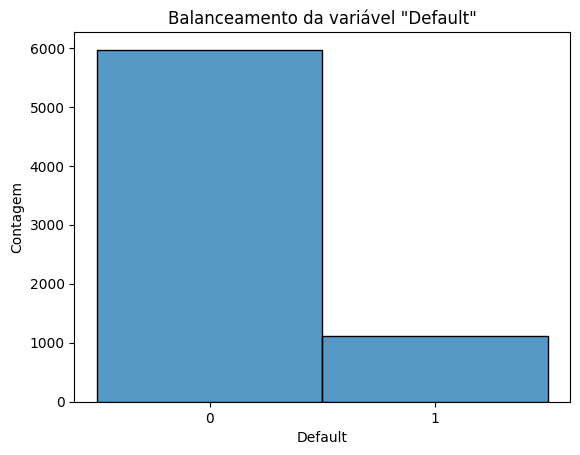

In [25]:
# Visualizando o desbalanceamento da variável alvo:

f = sns.histplot(data['default'], discrete=True)

f.set(title='Balanceamento da variável "Default"', xlabel='Default'.capitalize(), ylabel='Contagem')
plt.xticks([0, 1])


plt.show()


Podemos observar a proporção do desbalanceamento da variável alvo.

Visualização das variáveis categóricas:

In [26]:
# Definindo uma função para gerar os gráficos do dataset completo, dataset dos adimplentes e inadimplentes:

def graf_cat(df: pd.DataFrame, col: str):
    
    """Recebe um dataset e uma string da coluna e retorna 3 gráficos das frequências
    absolutas de cada classe na coluna dos datasets de entrada, dos adimplentes
    e inadimplentes."""
    
    titulos = [f'{col} dos Clientes', f'{col} dos Clientes Adimplentes', f'{col} dos Clientes Inadimplentes']
    
    eixo = 0
    max_y = 0
    max = data.select_dtypes('object').describe()[col]['freq'] * 1.1

    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
    
    data_inad = data[data['default']==1]
    data_adi = data[data['default']==0]

    for dataframe in [df, data_adi, data_inad]:

        df_to_plot = dataframe[col].value_counts().reset_index()
        df_to_plot.columns = [col, 'frequencia_absoluta']
        df_to_plot.sort_values(by=[col], inplace=True)    
        f = sns.barplot(x=col, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo])
    

        f.set(title=titulos[eixo], xlabel=col.capitalize(), ylabel='Frequência Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=45)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1
    
    figura.show()

In [27]:
# Gerando uma lista com as variáveis categóricas:

lista_cat = list(data.drop(columns=['sexo'], axis=1).select_dtypes('object').columns)
print(lista_cat)

['escolaridade', 'estado_civil', 'salario_anual', 'tipo_cartao']


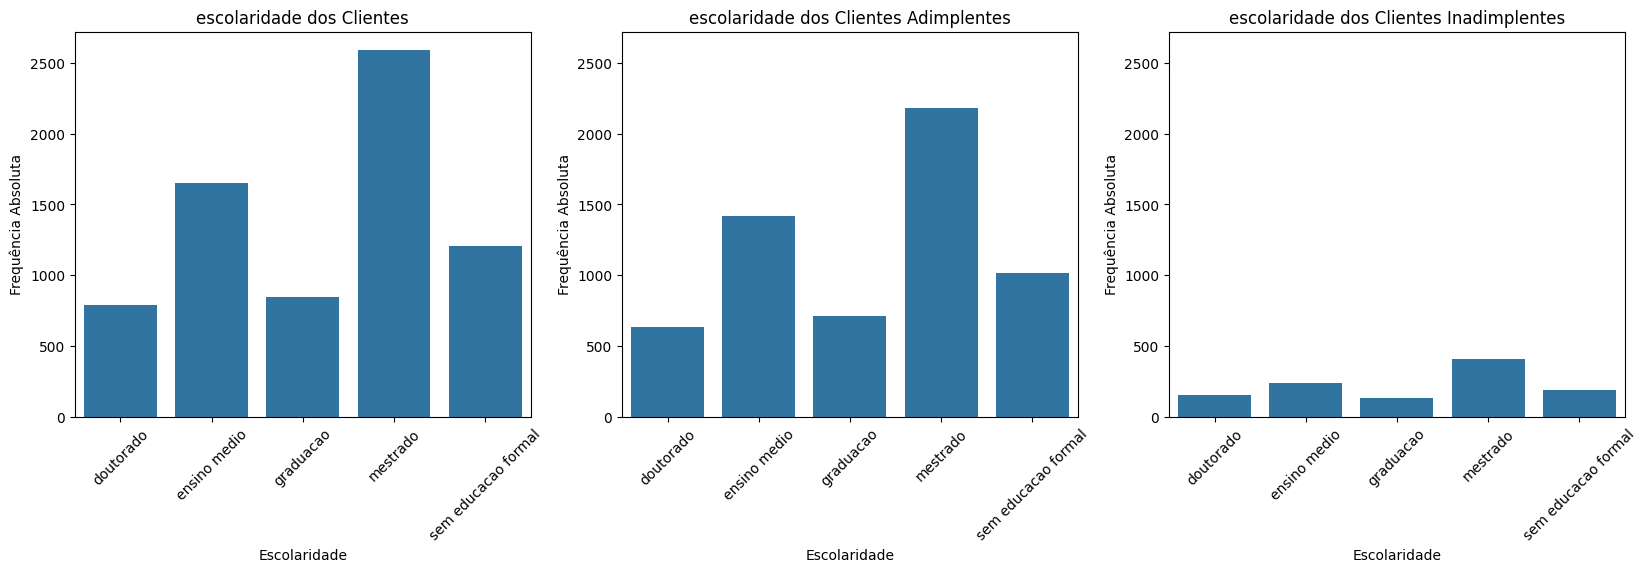

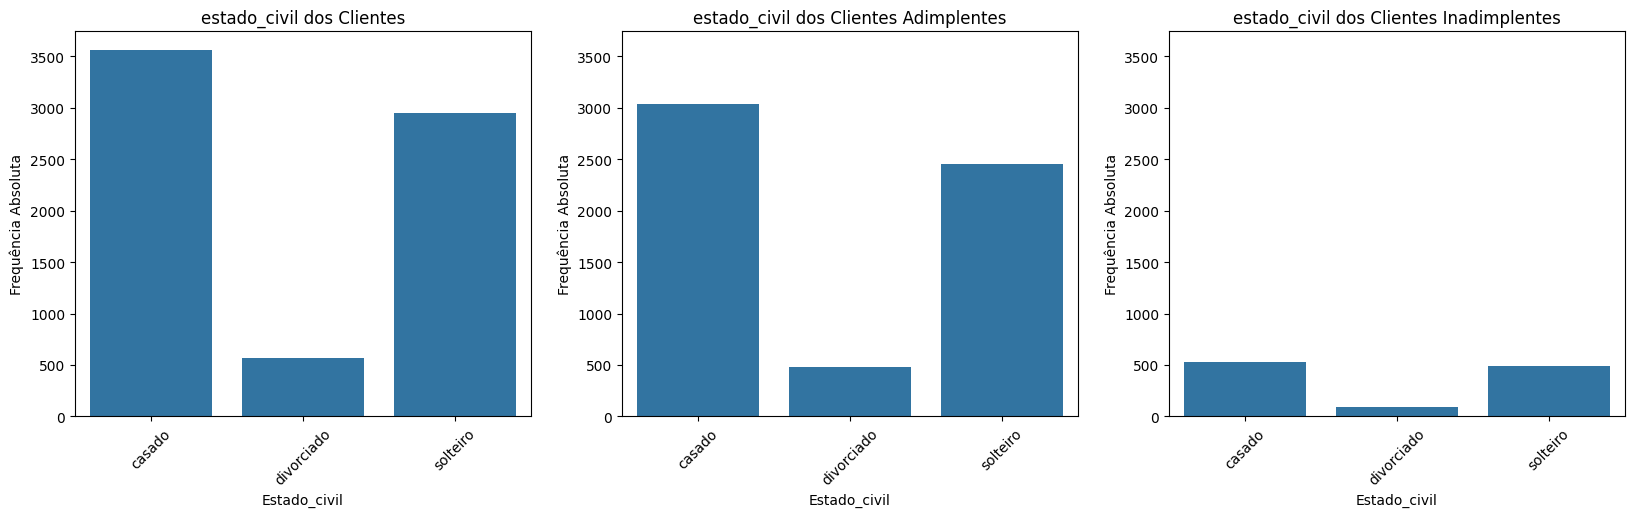

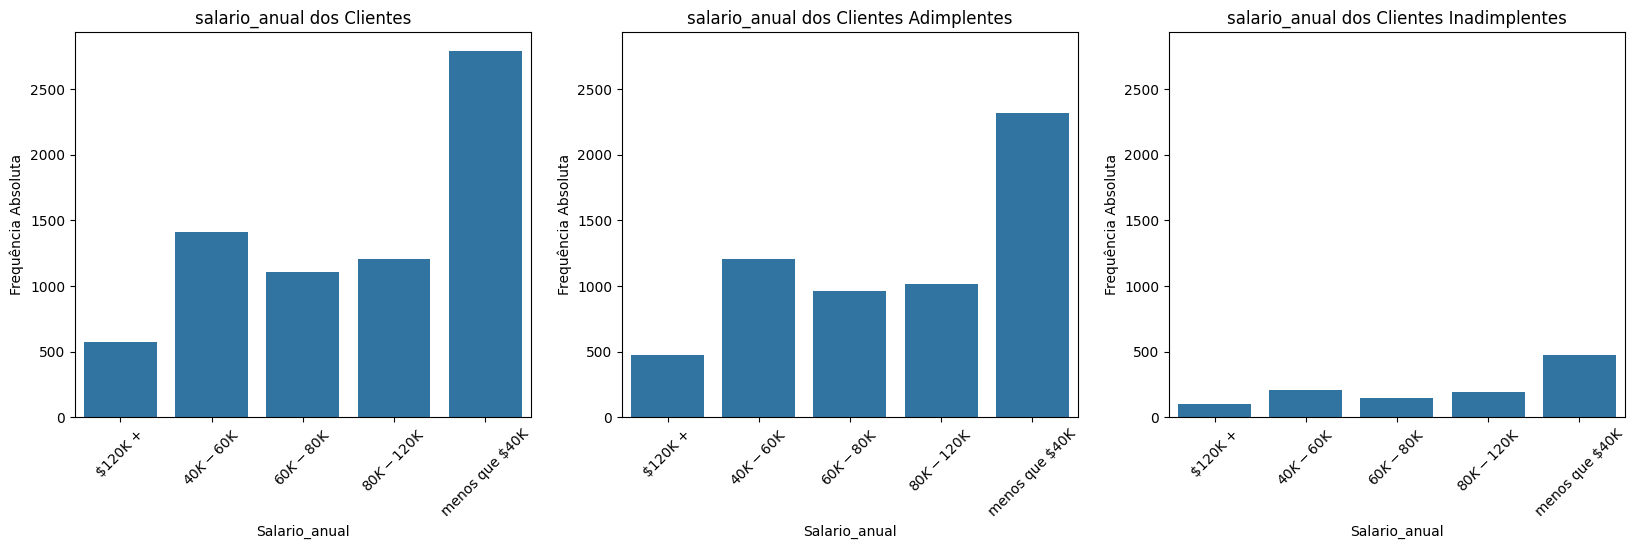

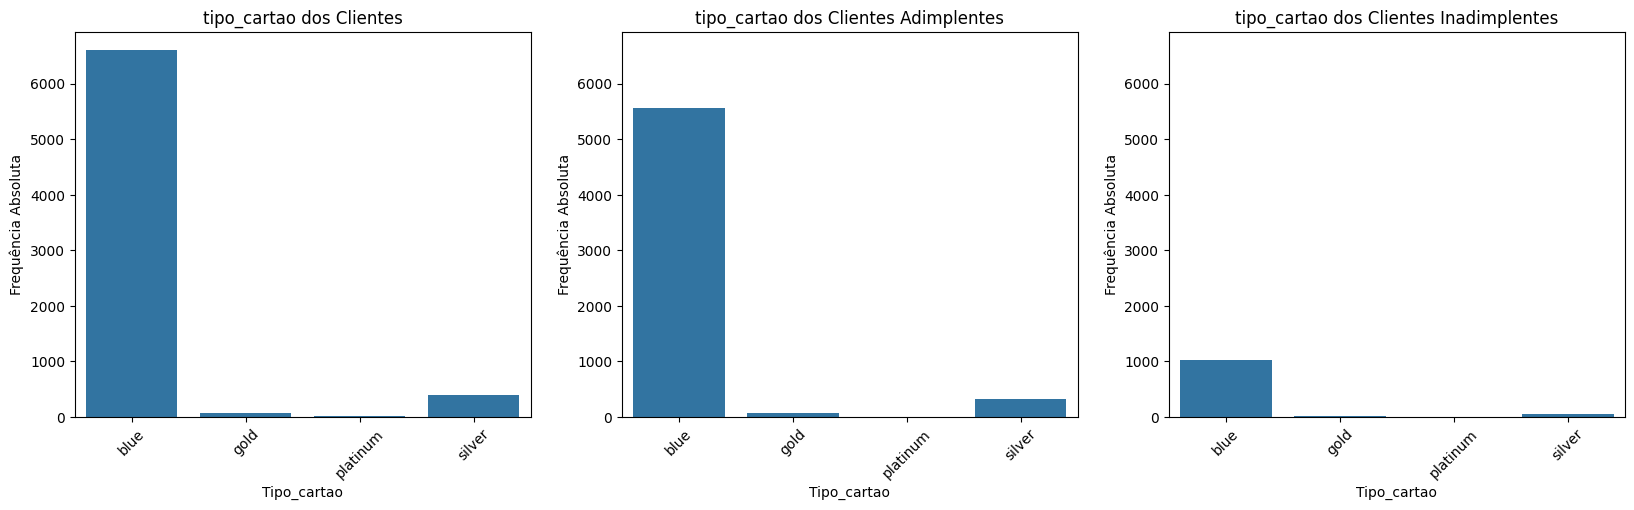

In [34]:
# Gerando os graficos destas variáveis:

warnings.filterwarnings("ignore", category=UserWarning)
graficos_categoricos = list(map(lambda x: graf_cat(df= data, col=x), lista_cat))


A cada linha recebemos 3 gráficos referente a variável escolhida, nestes 3 gráficos podemos observar a frequência absoluta das ocorrencias nos datasets completo, adimplentes e inadimplentes.



Podemos notar que a distribuição de valores das variáveis analisadas é aproximadamente a mesma para os clientes adimplentes e inadimplentes.

Visualização das variáveis numéricas:

In [30]:
# Definindo uma função para gerar os gráficos do dataset completo, dataset dos adimplentes e inadimplentes:

def graf_num(df: pd.DataFrame, col: str):
   
    """Recebe um dataset e uma string da coluna e retorna 3 histogramas da
    coluna dos datasets de entrada, dos adimplentes e inadimplentes."""
    
    
    titulos = [f'{col} dos Clientes', f'{col} dos Clientes Adimplentes', f'{col} dos Clientes Inadimplentes']
    
    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
    
    data_inad = data[data['default']==1]
    data_adi = data[data['default']==0]

    for dataframe in [df, data_adi, data_inad]:

        f = sns.histplot(x=col, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=col.capitalize(), ylabel='Frequência Absoluta')

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    figura.show()

In [31]:
# Gerando uma lista com as variáveis numéricas:

lista_num = list(data.drop(columns=['id', 'default'], axis=1).select_dtypes(exclude='object').columns)
print(lista_num)

['idade', 'dependentes', 'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m', 'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m', 'qtd_transacoes_12m']


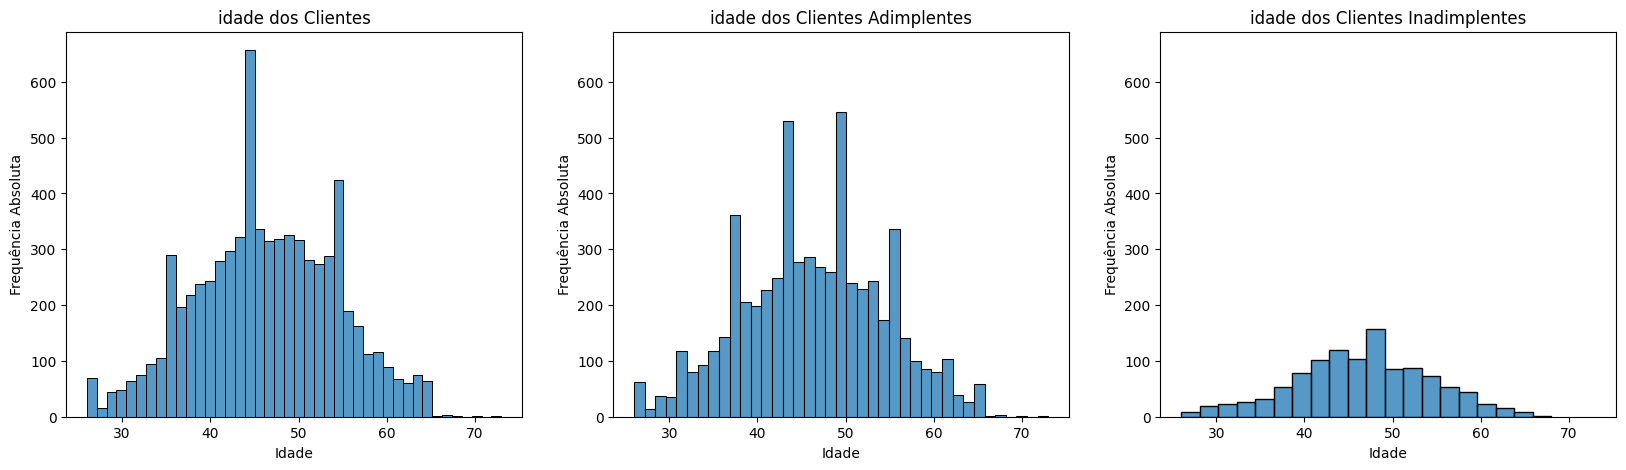

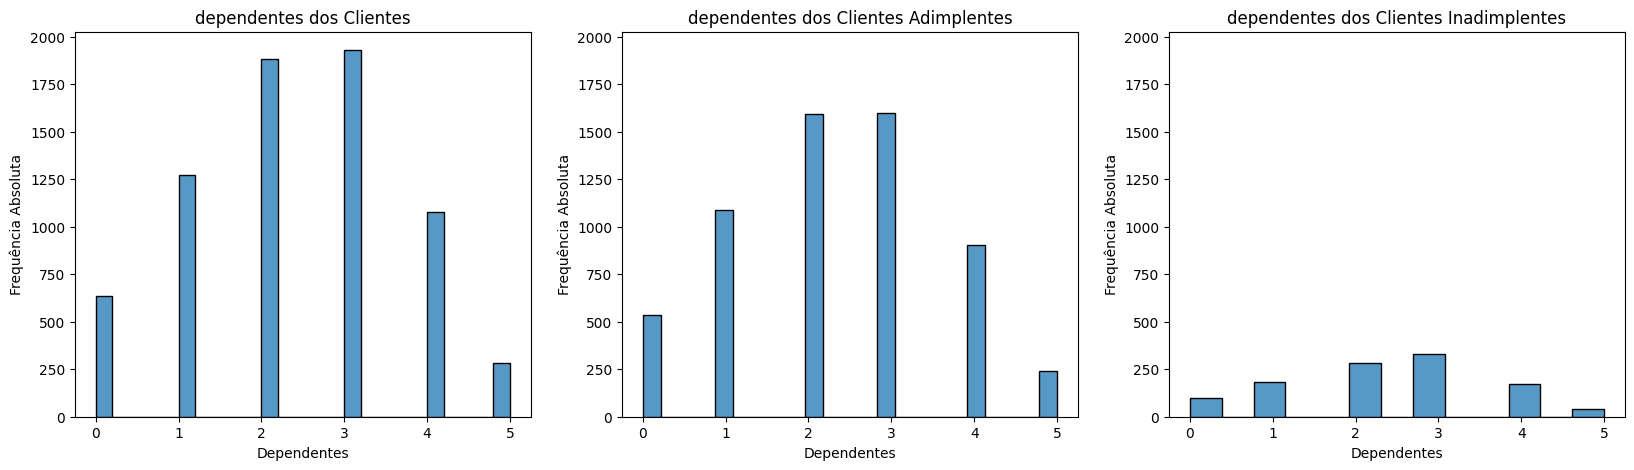

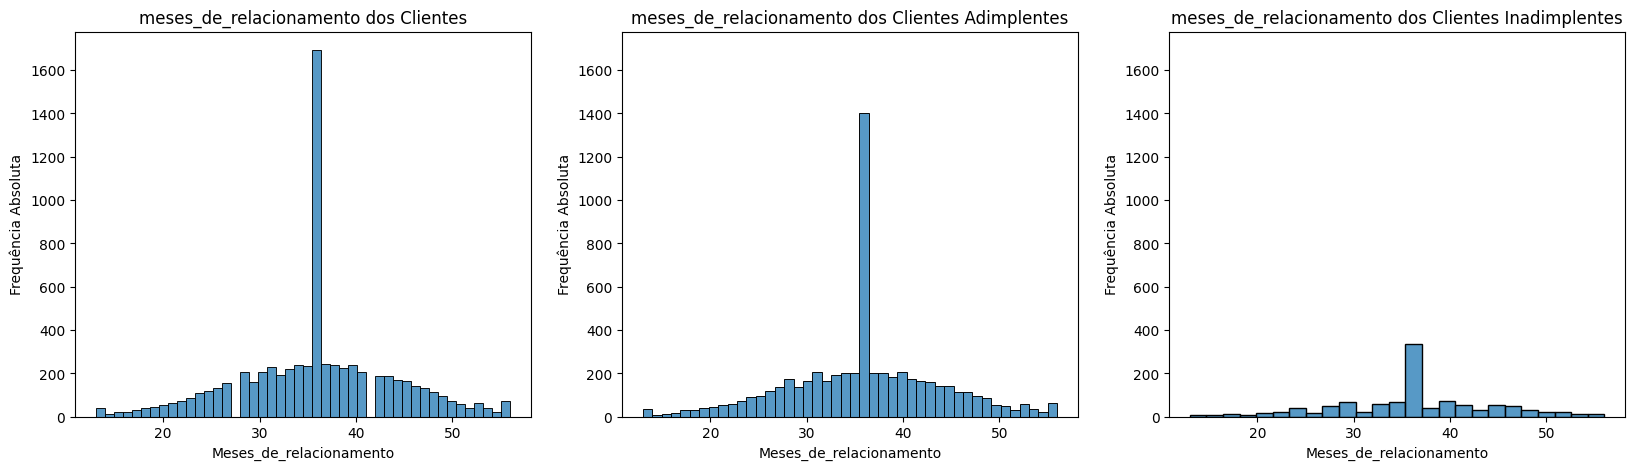

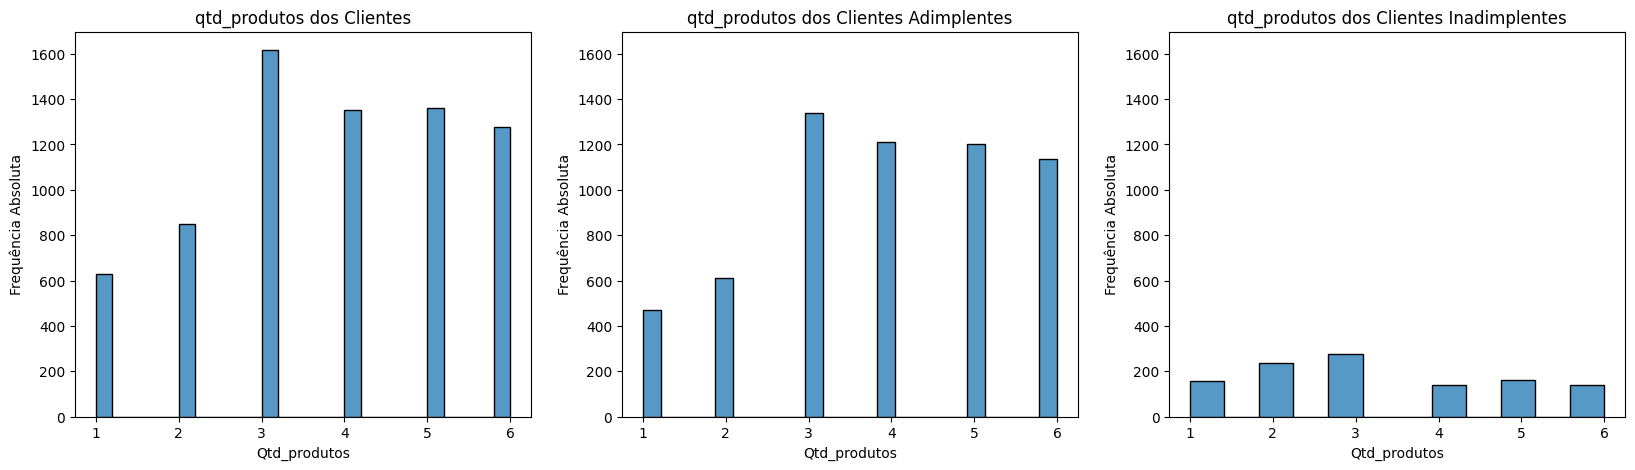

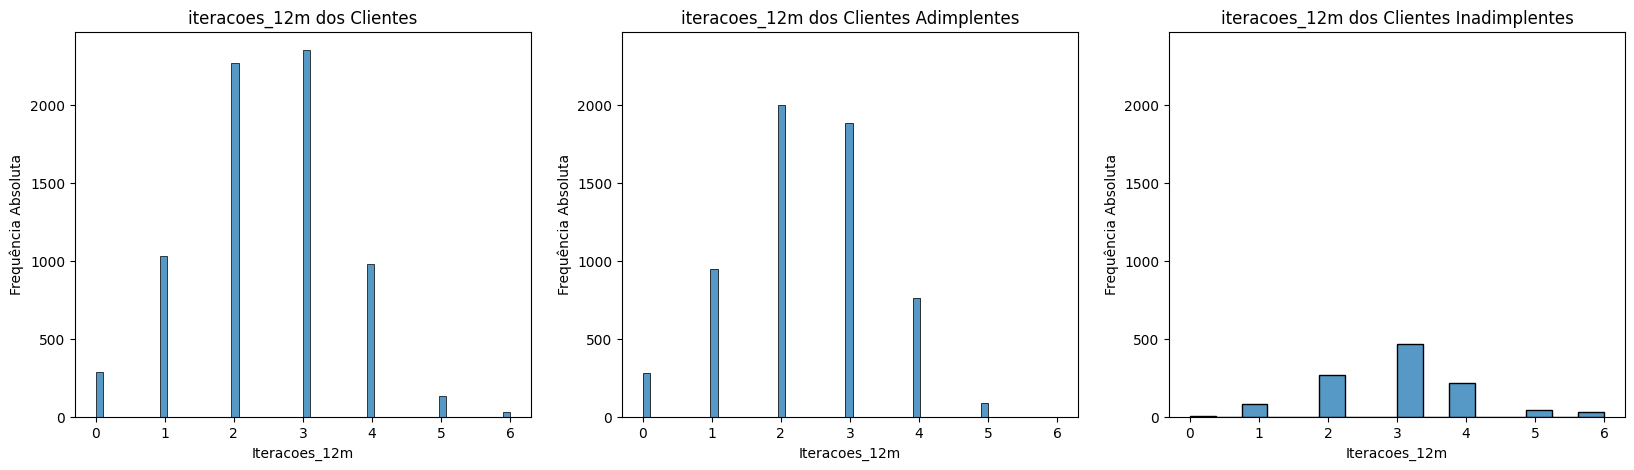

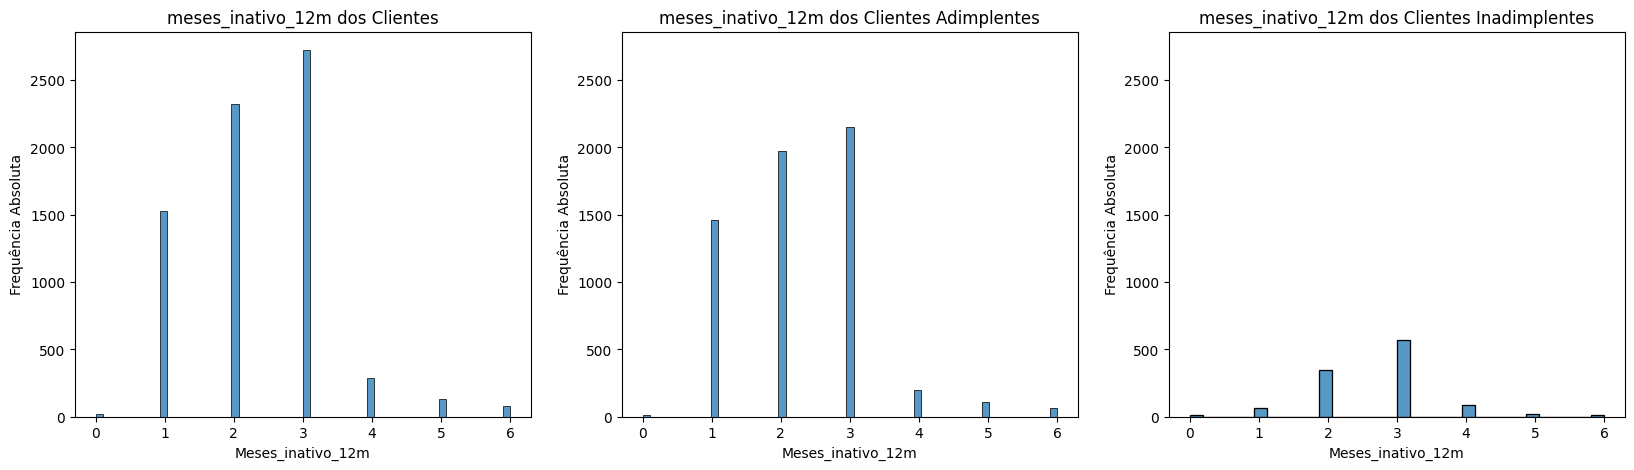

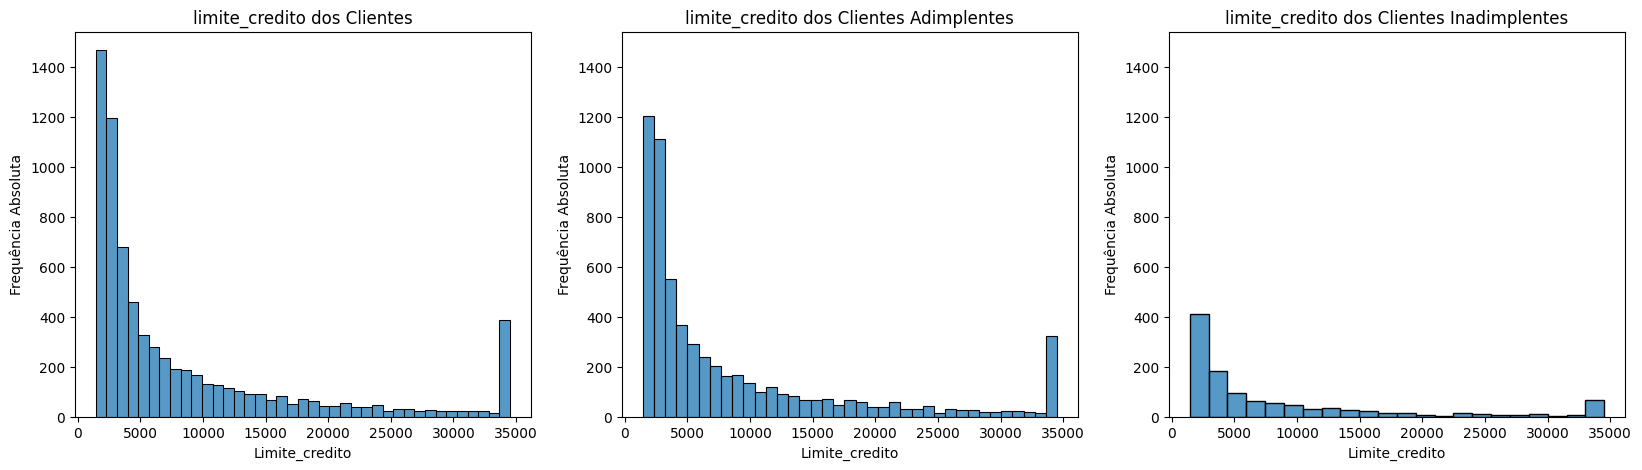

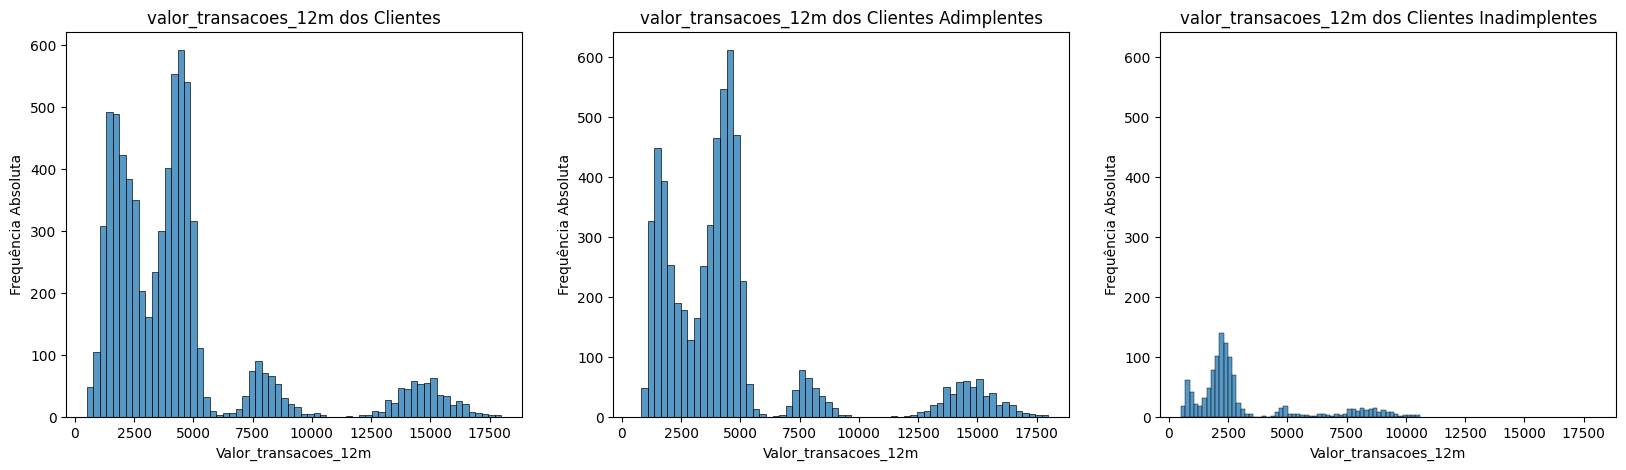

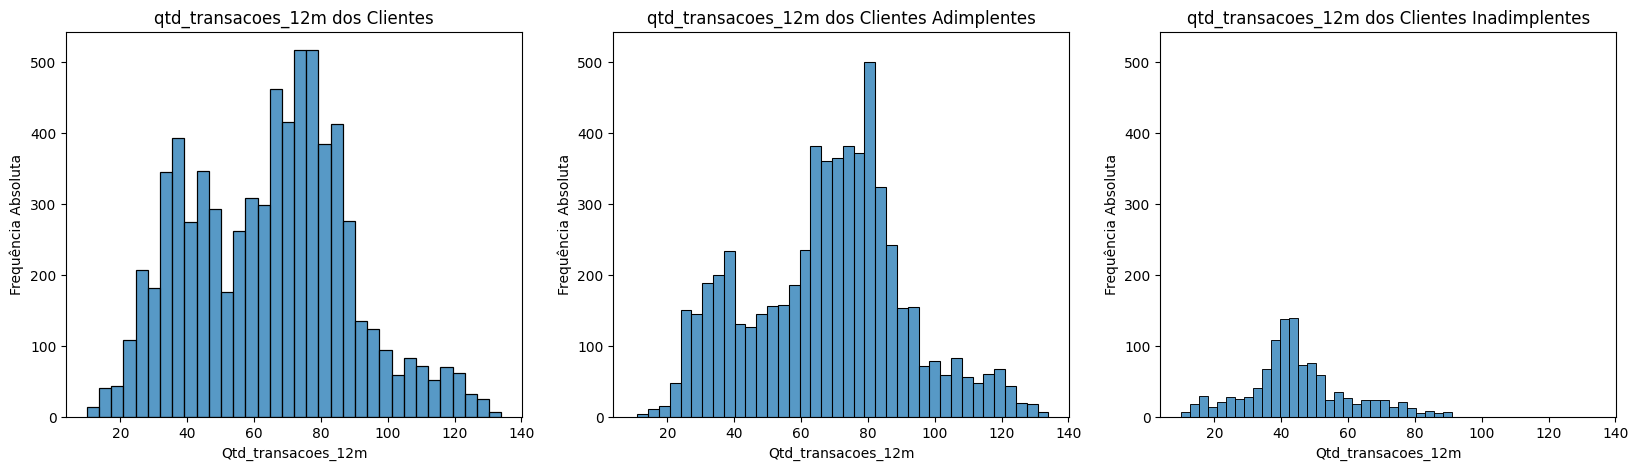

In [33]:
warnings.filterwarnings("ignore", category=UserWarning)
graficos_numericos = list(map(lambda x: graf_num(data, col=x), lista_num))

Novamente a cada linha recebemos 3 gráficos referente a variável escolhida, nestes 3 gráficos obtemos um histograma das ocorrencias nos datasets completo, adimplentes e inadimplentes.

Podemos notar uma diferença na distribuição das variáveis 'iteracoes_12m', 'valor_transacoes_12m' e 'qnt_transacoes_12m' em relação a inadimplentes e adimplentes.

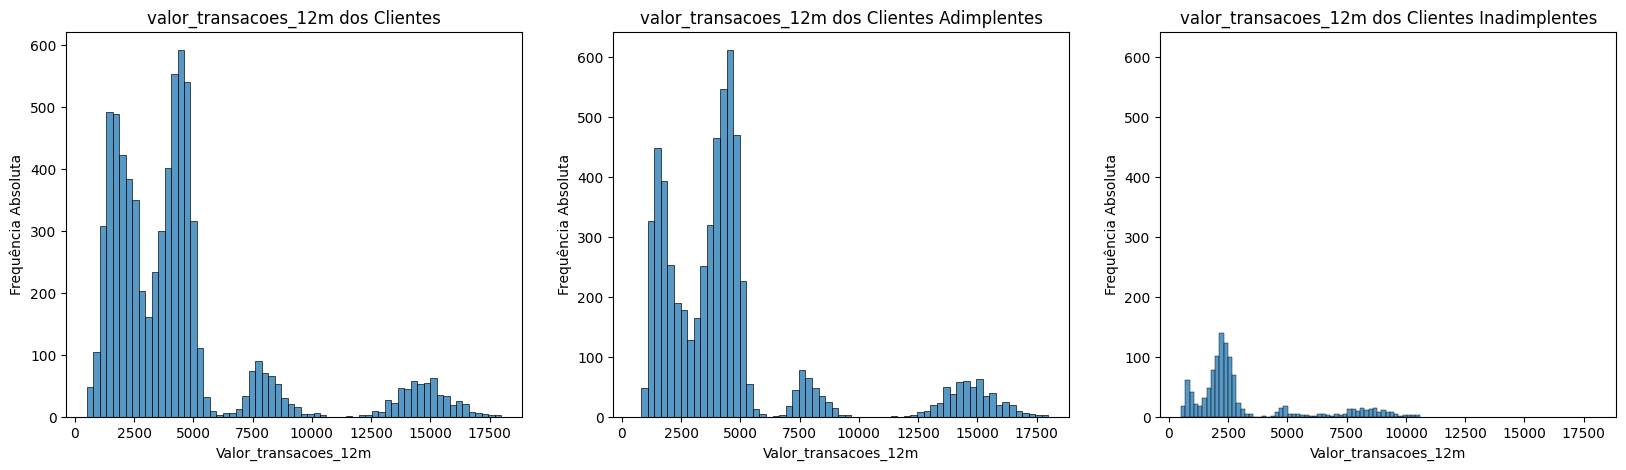

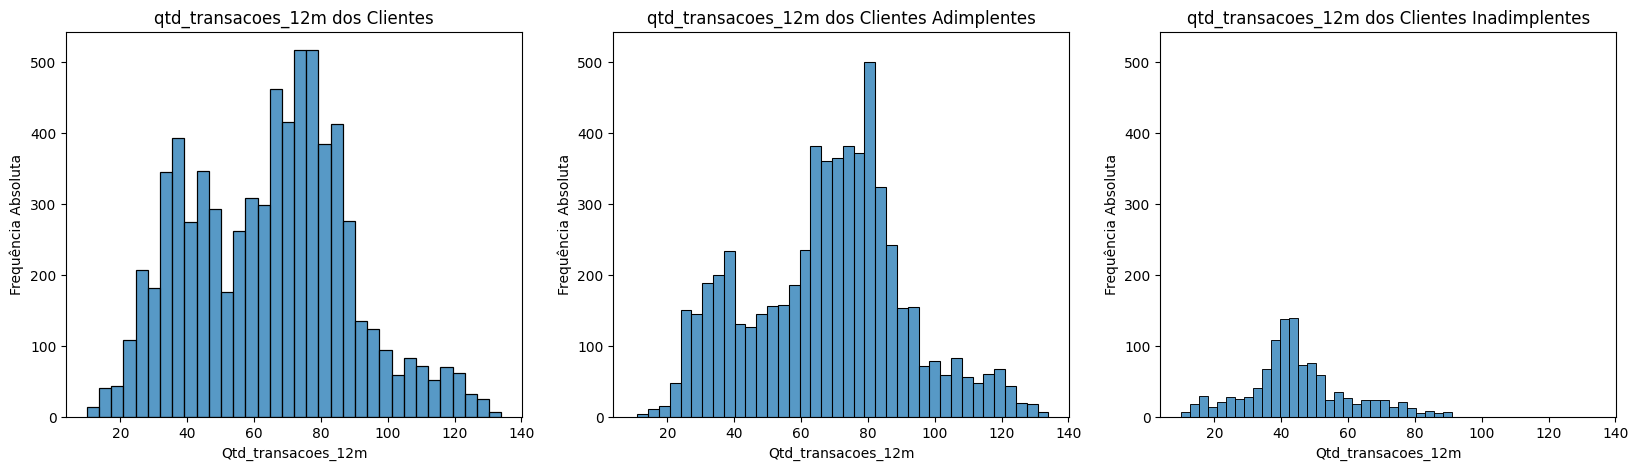

In [ ]:
lista = ['valor_transacoes_12m', 'qtd_transacoes_12m']

warnings.filterwarnings("ignore", category=FutureWarning)
graficos_numericos_2 = list(map(lambda x: graf_num(data, col=x), lista))

Podemos visualizar esta diferença na distribuição observando as médias:

In [ ]:
data_inad = data[data['default']==1]
data_adi = data[data['default']==0]

medias = pd.DataFrame({
    'labels':['Inadimplentes', 'Adimplentes'],
    'valor_transacoes_12m': [data_inad['valor_transacoes_12m'].mean(), data_adi['valor_transacoes_12m'].mean()],
    'qtd_transacoes_12m': [data_inad['qtd_transacoes_12m'].mean(), data_adi['qtd_transacoes_12m'].mean()]                                                                                  
}).set_index('labels')

medias.index.name=None
medias = medias.transpose()

print('Médias:')

medias

Médias:


,Inadimplentes,Adimplentes
valor_transacoes_12m,3106.789057,4635.007929
qtd_transacoes_12m,44.807727,68.176441


Devido a esta diferença, é possível que esta variáveis contenham informações relevantes para determinar um possível inadimplente.

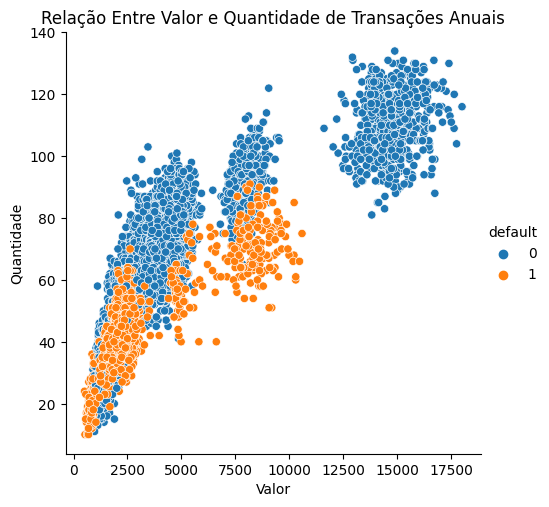

In [ ]:
# Visualizando a relação entre as duas variáveis:

f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=data, hue='default')
f.set(title='Relação Entre Valor e Quantidade de Transações Anuais', xlabel='Valor', ylabel='Quantidade')

plt.show()

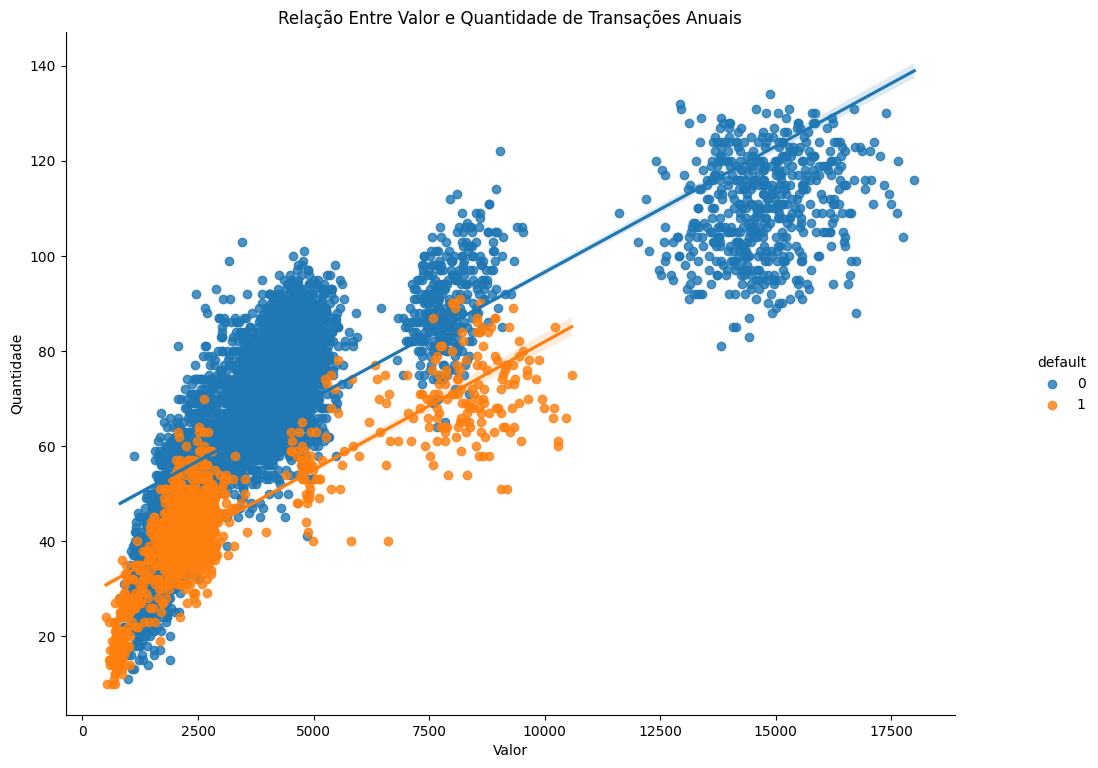

In [ ]:
f = sns.lmplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=data, hue='default')

plt.gcf().set_size_inches(12, 8)
f.set(title='Relação Entre Valor e Quantidade de Transações Anuais', xlabel='Valor', ylabel='Quantidade')

plt.show()

Com auxílio dos gráficos, podemos notar uma região no espaço (Quantidade x Valor) onde existem mais ocorrências de inadimplentes.

* A partir de um certo valor de transação anual (por volta dos 11000) não existem ocorrências de inadimplentes. 

* Para valores mais baixos, podemos notar que, para um valor fixo de transação, quanto menor a quantidade de transações mais ocorrências de inadimplentes surgem.

Com isso concluímos o objetivo inicial do projeto final de Python para Análise de Dados, fornecido pela EBAC.